# Predicting heart disease using machine learning

1. Goal
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Goal
Using machine learning to determine whether someone has heart disease or not based off of clinical data

## 2. Data
Using the University of California Irvine's heart disease dataset (https://archive.ics.uci.edu/ml/datasets/heart+disease, https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

## 3. Evaluation
The model is evaluated with its accuracy, recall, and F1 scores.

## 4. Features

(Taken from Kaggle description https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)
* **age** - The age of the patient.
* **sex** - The gender of the patient. (1 = male, 0 = female).
* **cp** - Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic).
* **trestbps** - Resting blood pressure in mmHg.
* **chol** - Serum Cholesterol in mg/dl.
* **fbs** - Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* **restecg** - Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* **thalach** - Max heart rate achieved.
* **exang** - Exercise induced angina (1 = yes, 0 = no).
* **oldpeak** - ST depression induced by exercise relative to rest.
* **slope** - Peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
* **ca** - Number of major vessels (0–3) colored by flourosopy.
* **thal** - Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* **target** - Diagnosis of heart disease (0 = absence, 1 = present)

In [72]:
# Install XGBoost package
!pip install xgboost==1.7.5

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Comment out XGBoost if you're having import issues
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    print("XGBoost not available. Some cells may not run.")
    XGBOOST_AVAILABLE = False

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv("heart-disease (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Analyzing data

1. What datatypes are present
2. Missing data
3. Determining outliers
4. Evaluating certain features

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# Determining how many targets are present
df["target"].value_counts() # 165 have heart disease, 138 do not

target
1    165
0    138
Name: count, dtype: int64

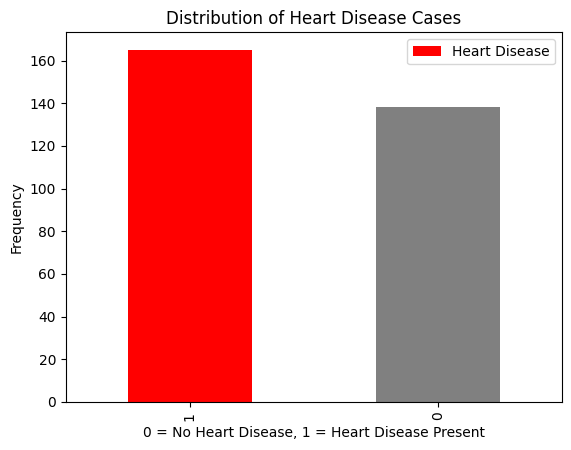

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["red", "grey"], title="Distribution of Heart Disease Cases");
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease Present")
plt.ylabel("Frequency")
plt.legend(["Heart Disease", "No Heart Disease"]);

In [ ]:
df.isna().sum() # No empty data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts() # 1 = male, 0 = female

sex
1    207
0     96
Name: count, dtype: int64

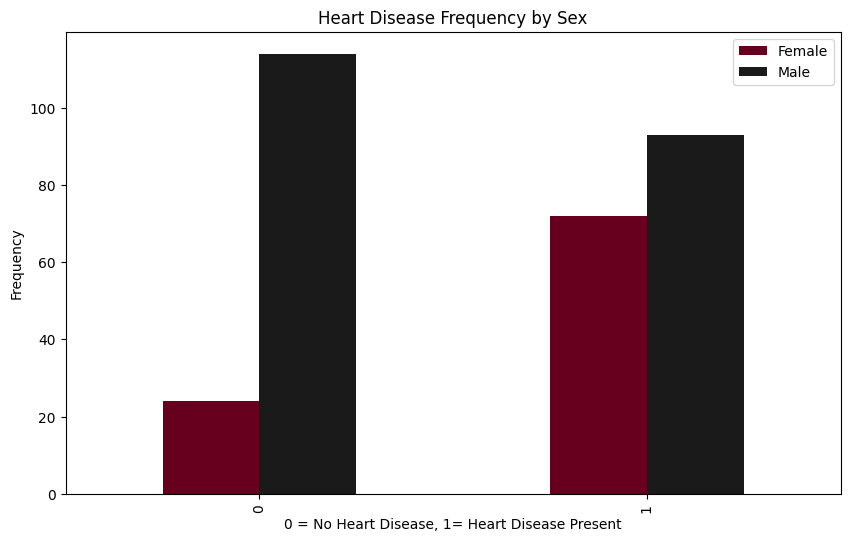

In [ ]:
# Heart disease by sex
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), cmap="RdGy");
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Heart Disease, 1= Heart Disease Present")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"]);

In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


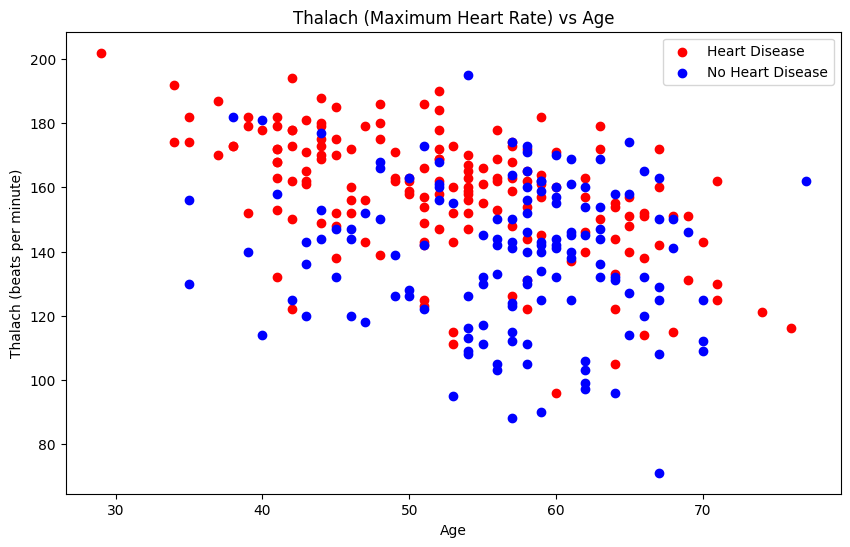

In [ ]:
# Thalach and Age
plt.figure(figsize=(10,6))

# Scatterplot with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='red', label='Heart Disease')

# Scatterplot with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='blue', label='No Heart Disease')
plt.title("Thalach (Maximum Heart Rate) vs Age")
plt.xlabel("Age")
plt.ylabel("Thalach (beats per minute)")
plt.legend();

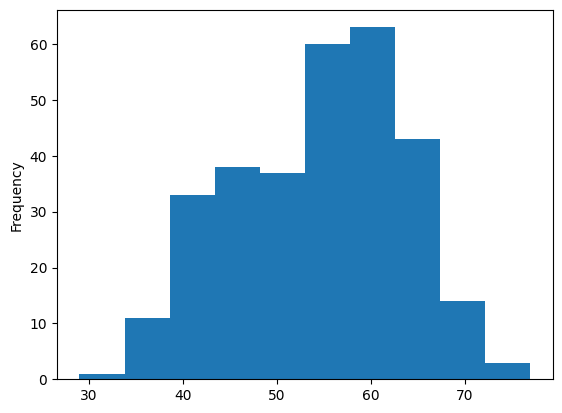

In [ ]:
# Distribution
df.age.plot.hist(); # Approximately normal (n is also greater than 30)

### Heart Disease Frequency by Chest Pain
1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic

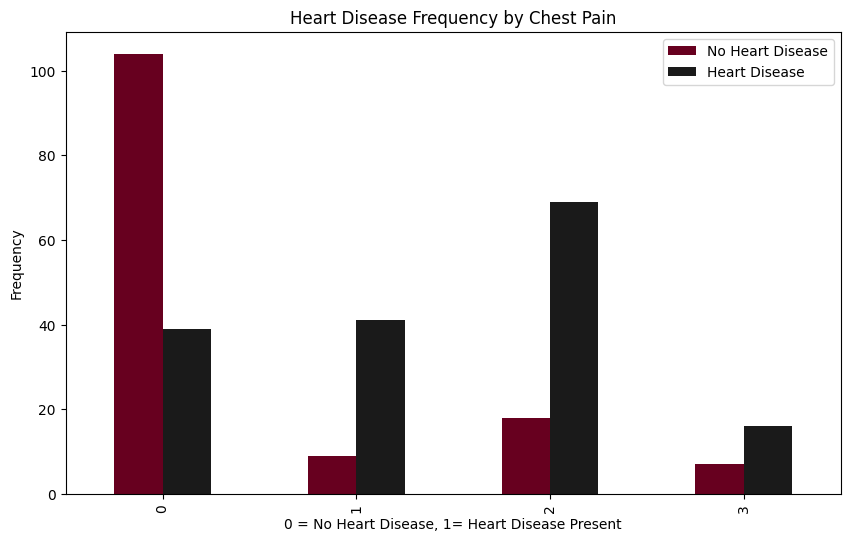

In [ ]:
# Heart disease by chest pain
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), cmap="RdGy");
plt.title("Heart Disease Frequency by Chest Pain")
plt.xlabel("0 = No Heart Disease, 1= Heart Disease Present")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease"]);

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


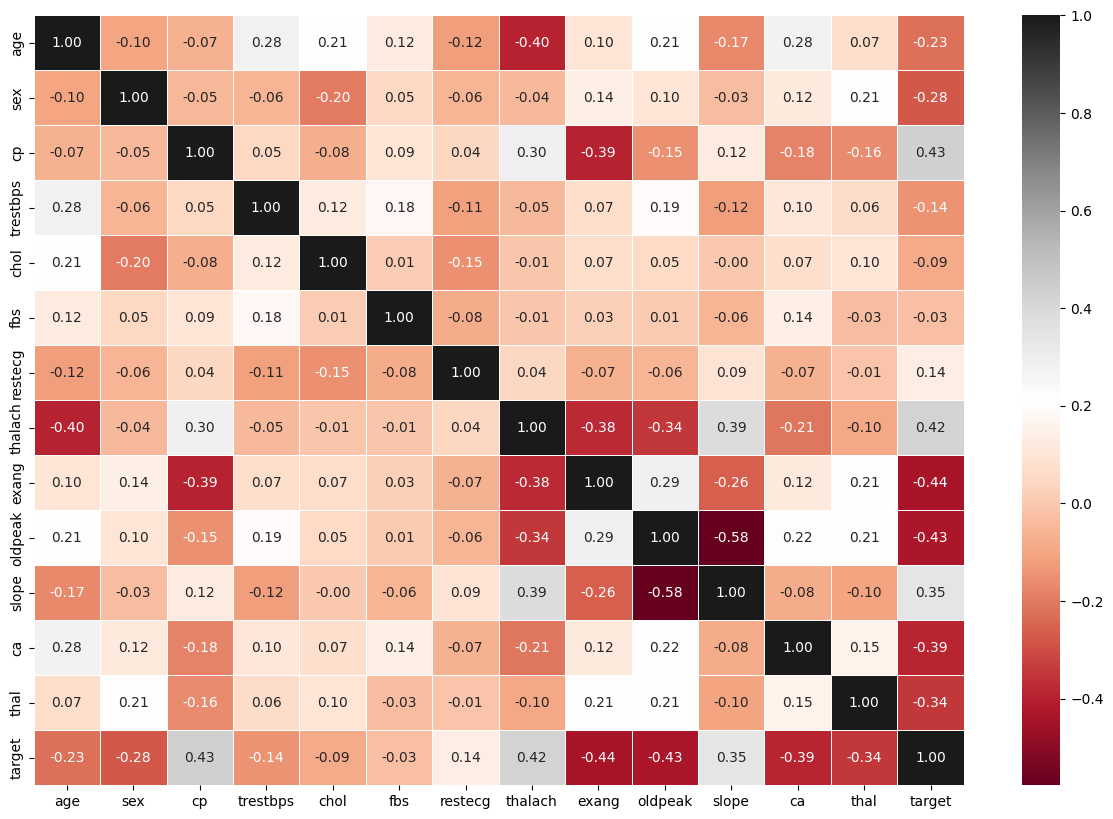

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=.7, fmt=".2f", cmap="RdGy")

## Modeling

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

4 models will be tested (Logistic Regression, K-Nearest Neighbors Classifier, Random Forest Classifier, XGBoost Classifier)

In [ ]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}

# Add XGBoost model if available
if XGBOOST_AVAILABLE:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

fit_and_score(models, X_train, X_test, y_train, y_test)

c:\Users\lvign\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

c:\Users\lvign\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


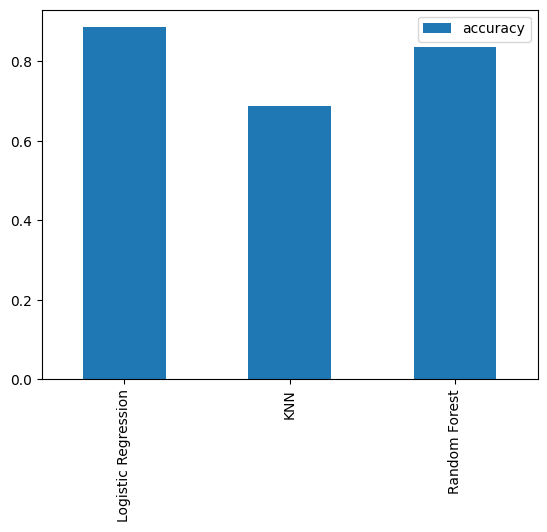

In [ ]:
pd.DataFrame(fit_and_score(models, X_train, X_test, y_train, y_test), index=["accuracy"]).T.plot.bar();

In [ ]:
# Scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

fit_and_score(models, X_train_sc, X_test_sc, y_train, y_test)

# Increases KNN but decreases Logistic Regression

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

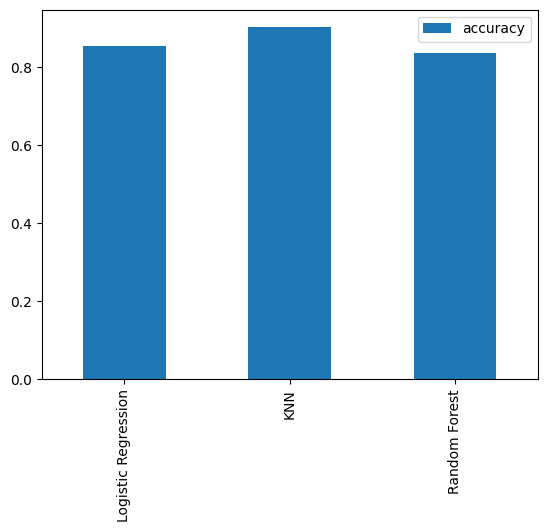

In [ ]:
pd.DataFrame(fit_and_score(models, X_train_sc, X_test_sc, y_train, y_test), index=["accuracy"]).T.plot.bar();

## Improving and Evaluating the Models

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision, Recall, F1 score
* Classification Report,
* ROC/AUC Curve

### Tuning KNN

In [ ]:
# Tuning KNN

train_scores = []
test_scores = []
neighbor_value = []

# Different n_neighbors values
neighbors = range(1,21)

knn = KNeighborsClassifier()
for i in neighbors:
    np.random.seed(42)
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train_sc, y_train)
    
    train_scores.append(knn.score(X_train_sc, y_train))
    
    test_scores.append(knn.score(X_test_sc, y_test))
    
    neighbor_value.append(i)

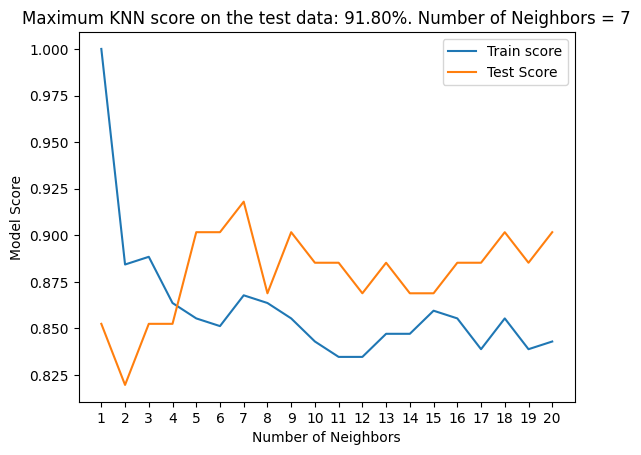

In [ ]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();
plt.title(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%. Number of Neighbors = {test_scores.index(max(test_scores))+1}");

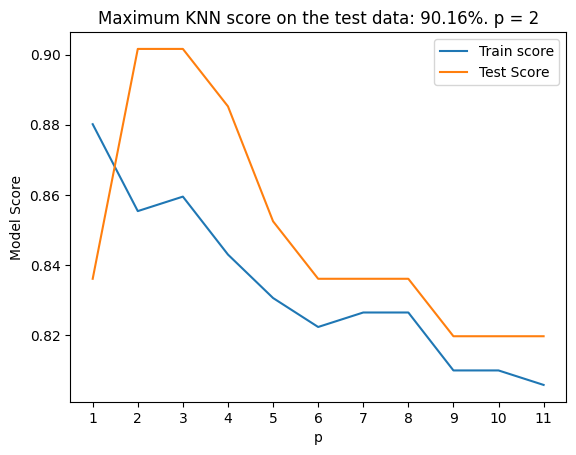

In [ ]:
# Tuning KNN

train_scores = []
test_scores = []

# Different p values
p = range(1,12)

knn = KNeighborsClassifier()
for i in p:
    np.random.seed(42)
    knn.set_params(p=i)
    
    knn.fit(X_train_sc, y_train)
    
    train_scores.append(knn.score(X_train_sc, y_train))
    
    test_scores.append(knn.score(X_test_sc, y_test))

plt.plot(p, train_scores, label='Train score')
plt.plot(p, test_scores, label="Test Score")
plt.xticks(np.arange(1,12,1))
plt.xlabel("p")
plt.ylabel("Model Score")
plt.legend();
plt.title(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%. p = {test_scores.index(max(test_scores))+1}");

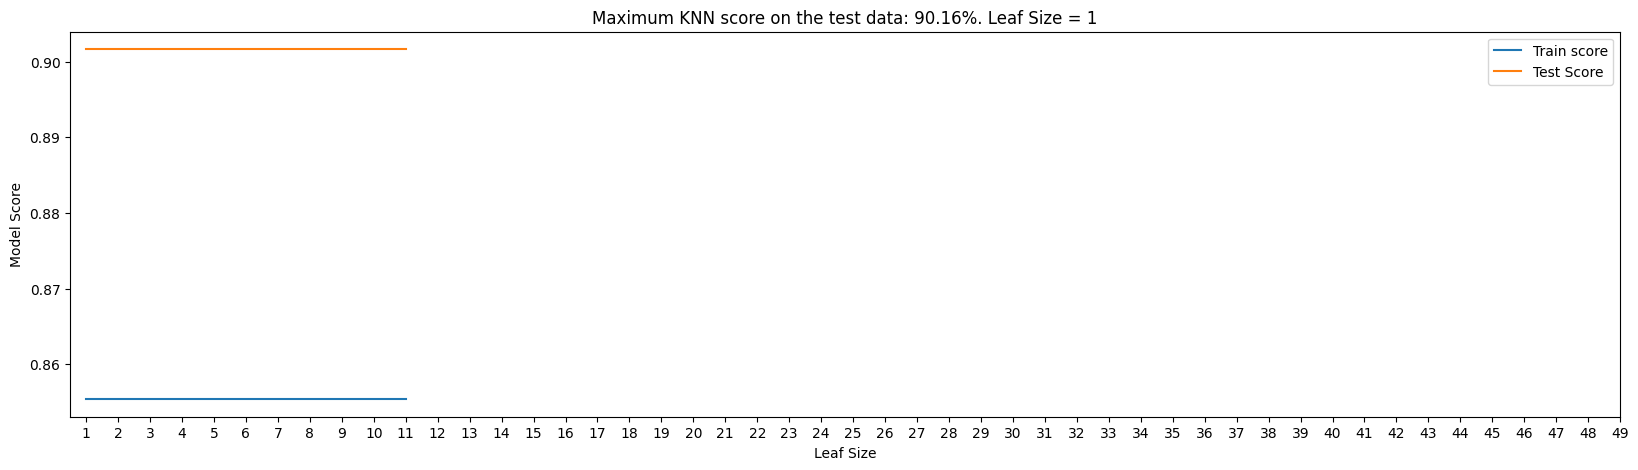

In [ ]:
# Tuning KNN

train_scores = []
test_scores = []

# Different n_neighbors values
leaf_size = range(1,50)

knn = KNeighborsClassifier()
for i in p:
    np.random.seed(42)
    knn.set_params(leaf_size=i)
    
    knn.fit(X_train_sc, y_train)
    
    train_scores.append(knn.score(X_train_sc, y_train))
    
    test_scores.append(knn.score(X_test_sc, y_test))

plt.figure(figsize=(20,5))
plt.plot(p, train_scores, label='Train score')
plt.plot(p, test_scores, label="Test Score")
plt.xticks(np.arange(1,50,1))
plt.xlabel("Leaf Size")
plt.ylabel("Model Score")
plt.legend();
plt.title(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%. Leaf Size = {test_scores.index(max(test_scores))+1}");

In [ ]:
# Highest KNN Score
knn_tuned = KNeighborsClassifier(n_neighbors=7)
knn_tuned.fit(X_train_sc, y_train)
knn_tuned.score(X_test_sc, y_test)

0.9180327868852459

### Using RandomizedSearchCV

Tuning LogisticRegression() and RandomForestClassifier() using RandomizedSearchCV()

Already found optimal KNN parameters

In [ ]:
# Creating hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20), "solver": ["liblinear"]}

# Creating hyperparameter grid for RandomForest
rf_grid = {"n_estimators": np.arange(10,1000,50), "max_depth": [None,3,5,10], "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)}

In [ ]:
# Tune LogisticRegression with scaled data

np.random.seed(42)

rs_log_reg_sc = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=10, n_iter=20, 
                                     verbose=True)

rs_log_reg_sc.fit(X_train_sc, y_train)
rs_log_reg_sc.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'solver': 'liblinear', 'C': 0.0001}

In [ ]:
rs_log_reg_sc.score(X_test_sc, y_test)

0.8688524590163934

In [ ]:
# Tune LogisticRegression with unscaled data

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, 
                                     verbose=True)

rs_log_reg.fit(X_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

LogisticRegression tuning has not improved the model

Tuning RandomForest

In [ ]:
# Tuning RandomForest on scaled data
np.random.seed(42)

rs_rf_sc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rs_rf_sc.fit(X_train_sc, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf_sc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf_sc.score(X_test_sc, y_test)

0.8688524590163934

In [ ]:
# Tuning RandomForest on unscaled data
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning hyperparameters with GridSearchCV

In [ ]:
# Tuning for scaled data
log_reg_grid = {"C": np.logspace(-4,4,30), "solver": ["liblinear"]}

gs_log_reg_sc = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg_sc.fit(X_train_sc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg_sc.best_params_

{'C': 0.01610262027560939, 'solver': 'liblinear'}

In [ ]:
gs_log_reg_sc.score(X_test_sc, y_test)

0.8852459016393442

In [ ]:
# Tuning for unscaled data
log_reg_grid = {"C": np.logspace(-4,4,30), "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating model

K Nearest Neighbors with n_neighbors=7 gives highest accuracy. Evaluate with:
* ROC Curve and AUC Score
* Confusion Matrix
* Classifiction Report
* Precision, Recall, F1

### Tuning XGBoost

XGBoost is a powerful gradient boosting algorithm that often performs well on structured data like this.

In [ ]:
# Creating hyperparameter grid for XGBoost
xgb_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

np.random.seed(42)

rs_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=xgb_grid, 
    cv=5,
    n_iter=20,
    verbose=True
)

rs_xgb.fit(X_train_sc, y_train)
rs_xgb.best_params_

In [ ]:
# Evaluate the tuned XGBoost model
rs_xgb.score(X_test_sc, y_test)

In [ ]:
# Compare all tuned models
best_models = {
    "Logistic Regression": LogisticRegression(C=rs_log_reg.best_params_['C'], solver='liblinear'),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Random Forest": RandomForestClassifier(**rs_rf.best_params_),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', **rs_xgb.best_params_)
}

# Score all the best models
best_scores = fit_and_score(best_models, X_train_sc, X_test_sc, y_train, y_test)
pd.DataFrame([best_scores], index=["accuracy"]).T.plot.bar(figsize=(10,6), title="Model Comparison (Tuned Parameters)");

In [ ]:
# 92% accuracy, recall, and f1

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_sc, y_train)
y_preds = model.predict(X_test_sc)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



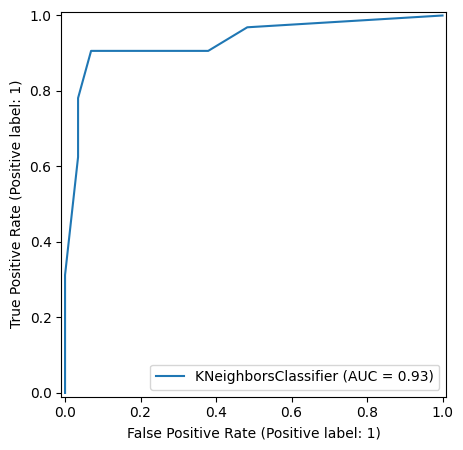

In [ ]:
# Plot ROC and get AUC
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(7,5))
RocCurveDisplay.from_estimator(model, X_test_sc, y_test, ax=ax);

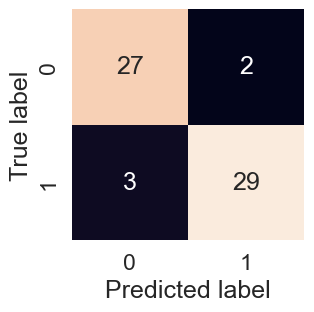

In [ ]:
# Creating a confusion matrix

def create_conf_mat(y_test, y_preds):
    sns.set(font_scale=1.5)
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

create_conf_mat(y_test, y_preds)

### Feature Importance

This will be done with LogisticRegression instead of KNN because the former is a linear model

In [ ]:
# LogisticRegression model (which is linear) will be used 
clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\lvign\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.coef_

array([[ 9.90846761e-03, -1.14399322e+00,  8.31270279e-01,
        -1.17956028e-02, -9.03591051e-04, -7.85754385e-04,
         4.85591574e-01,  2.69900444e-02, -7.99753456e-01,
        -7.19528639e-01,  5.82133556e-01, -8.27425719e-01,
        -1.03513374e+00]])

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.009908467605542884,
 'sex': -1.1439932244718576,
 'cp': 0.8312702789721943,
 'trestbps': -0.011795602821944293,
 'chol': -0.0009035910510346922,
 'fbs': -0.0007857543851310291,
 'restecg': 0.4855915738317119,
 'thalach': 0.026990044446613987,
 'exang': -0.799753455548488,
 'oldpeak': -0.7195286386726639,
 'slope': 0.582133556428645,
 'ca': -0.8274257185243469,
 'thal': -1.0351337394572893}

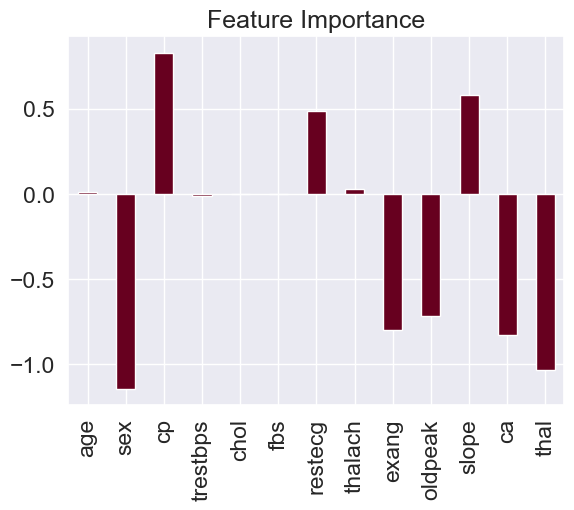

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, cmap="RdGy");

#### Based off of the bar chart, women are more likely to have heart disease (this dataset has a higher proportion of women with heart disease than men)
#### As the type of chest pain increases (towards asymptomatic), heart disease is more likely
#### Slight correlation between high blood pressure and heart disease
#### As the restecg increases (more abnormalities), heart disease does so as well
#### Negative correlation between have exercised induced angina and having heart disease
#### Negative correlation between oldpeak and heart disease
#### As ST segments increase (more downward), so does heart disease
#### The number of vessels is negativley correlated with heart disease
#### Negative correlation between thalassemia and heart disease

### Removing low-correlated values
This can potentially improve the KNN model

In [ ]:
df_removed = df.drop(["chol"], axis=1)
X_removed = df_removed.drop("target", axis=1)
y_removed = df_removed["target"]

np.random.seed(42)

X_removed_train, X_removed_test, y_removed_train, y_removed_test = train_test_split(X_removed,y_removed,test_size=0.2)
scaler.fit(X_removed_train)
X_removed_train_sc = scaler.transform(X_removed_train)
X_removed_test_sc = scaler.transform(X_removed_test)

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_removed_train_sc, y_removed_train)
clf.score(X_removed_test_sc, y_removed_test)

# Removing cholesterol has no difference on accuracy
# Removing any other columns decreases accuracy
# Current data set fits model best

0.9180327868852459

### Saving model

This saved model will be used for the webapp

In [ ]:
import pickle

# Redefining model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
with open("heart_disease_classifier_model", "wb") as f:
    pickle.dump(model,f)

In [ ]:
# Opening saved model to test if it works
with open("heart_disease_classifier_model", "rb") as f:
    loaded_m = pickle.load(f)

In [ ]:
# The saved model works
y_preds = loaded_m.predict(X_test_sc)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### Saving XGBoost model if it performs better

If XGBoost performs better than KNN, we may want to save it instead.

In [ ]:
# Compare KNN and XGBoost performance
if best_scores['XGBoost'] > best_scores['KNN']:
    print(f"XGBoost performs better with accuracy: {best_scores['XGBoost']:.4f} vs KNN: {best_scores['KNN']:.4f}")
    # Save XGBoost model
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **rs_xgb.best_params_)
    xgb_model.fit(X_train_sc, y_train)
    with open("xgboost_heart_disease_model", "wb") as f:
        pickle.dump(xgb_model, f)
    print("XGBoost model saved as 'xgboost_heart_disease_model'")
    
    # Test the saved model
    with open("xgboost_heart_disease_model", "rb") as f:
        loaded_xgb = pickle.load(f)
    xgb_preds = loaded_xgb.predict(X_test_sc)
    print("XGBoost Model Performance:")
    print(classification_report(y_test, xgb_preds))
else:
    print(f"KNN still performs better with accuracy: {best_scores['KNN']:.4f} vs XGBoost: {best_scores['XGBoost']:.4f}")
    print("Keeping the KNN model as the best performer.")
